In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import necessary library
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from tensorflow import feature_column as fc
from IPython.display import clear_output

In [4]:
# Load the dataset from CSV file
dftrain=pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
dftest=pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/eval.csv")
# Assign result of an operation
y_train=dftrain.pop("survived")
y_test=dftest.pop("survived")

In [5]:
# Display first few rows of passenger
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [6]:
# Display first few rows of surival coloumn
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [7]:
# Summary statistics
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


<Axes: >

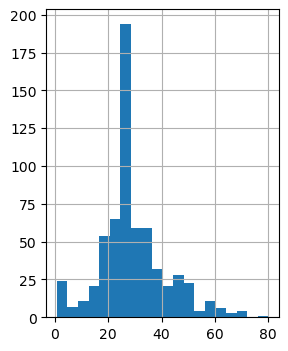

In [8]:
# Assign result of an operation to find age group
dftrain.age.hist(bins=20,figsize=(3,4))

<Axes: ylabel='sex'>

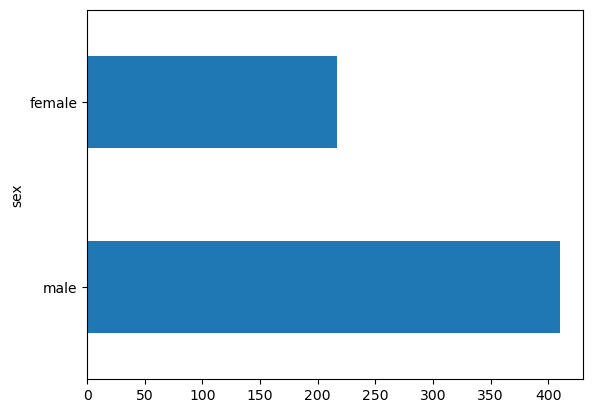

In [9]:
# Assign result of an operation to find sex ratio
dftrain.sex.value_counts().plot(kind="barh")

<Axes: ylabel='class'>

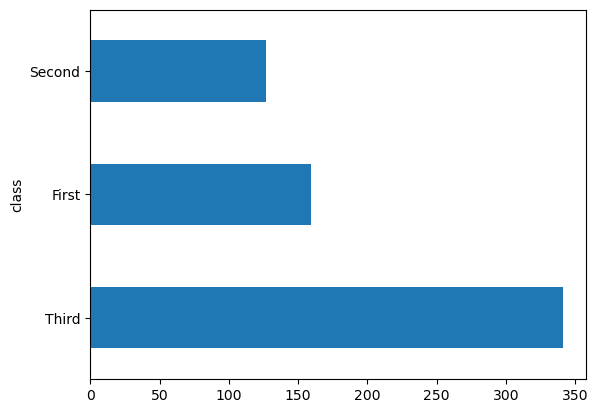

In [10]:
# Assign result of an operation to find the class
dftrain['class'].value_counts().plot(kind="barh")

<Axes: xlabel='embark_town'>

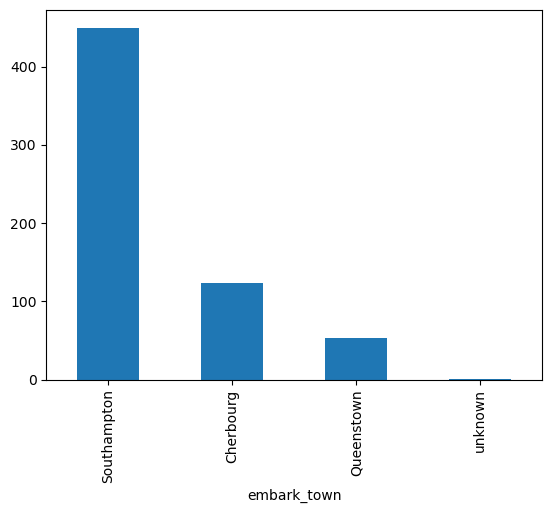

In [11]:
# Assign result of an operation to find where the passenger lives
dftrain['embark_town'].value_counts().plot(kind='bar')

Text(0.5, 0, '% survive')

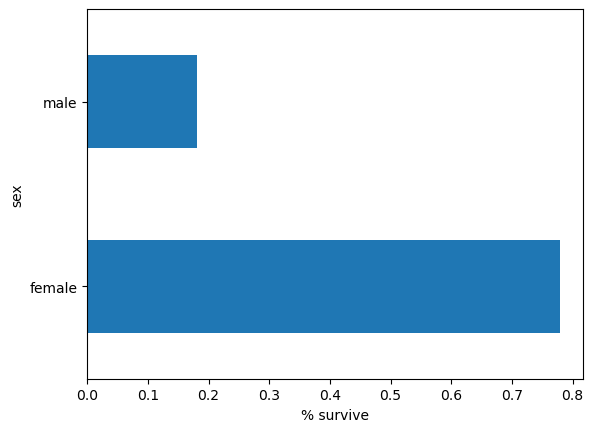

In [12]:
# Assign result of an operation of surviving sex ratio
pd.concat([dftrain,y_train],axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

In [13]:
# Display first few rows
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [14]:
# Assign result of an operation
CATEGORICAL_COLOUMN=['sex','n_siblings_spouses','parch','deck','class','embark_town','alone']
NUMERICAL_COLOUMN=['age','fare']

feature_coloumn=[]

for feature_name in CATEGORICAL_COLOUMN:
    vocalbulary=dftrain[feature_name].unique()
    feature_coloumn.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name,vocalbulary))
    
for feature_name in NUMERICAL_COLOUMN:
    feature_coloumn.append(tf.feature_column.numeric_column(feature_name,dtype=tf.float32))

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [15]:
# Display output
print(feature_coloumn)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [16]:
# Assign result of an operation
def make_input_func(data_df,label_df,num_epochs=10,shuffle=True,batch_size=32):
    def input_func():
        ds=tf.data.Dataset.from_tensor_slices((dict(data_df),label_df))
        if shuffle:
            ds=ds.shuffle(1000)
        ds=ds.batch(batch_size).repeat(num_epochs)
        return ds
    
    return input_func

In [17]:
# Assign result of an operation
train_input_fn=make_input_func(dftrain,y_train)
test_input_fn=make_input_func(dftest,y_test,num_epochs=1,shuffle=False)

In [18]:
# Display output
print(train_input_fn)

<function make_input_func.<locals>.input_func at 0x0000025113EA1D00>


In [19]:
# Assign result of an operation
linear_est=tf.estimator.LinearClassifier(feature_columns=feature_coloumn)

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\adity\\AppData\\Local\\Temp\\tmp4_ls02og', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_t

In [20]:
linear_est.train(train_input_fn)
# Assign result of an operation
result=linear_est.evaluate(test_input_fn)

clear_output
# Display output
print(result)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Done calling model_fn.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\adity\AppData\Local\Temp\tmp4_ls02og\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
Instructions for updating:
Use tf.keras instead.


INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\adity\AppData\Local\Temp\tmp4_ls02og\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


<Axes: title={'center': 'predicted probabilities'}, ylabel='Frequency'>

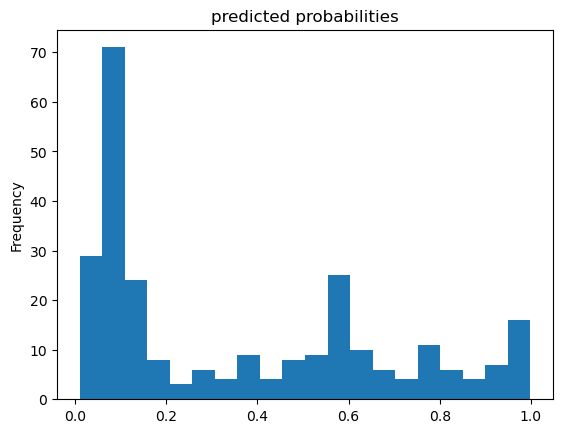

In [21]:
# Assign result of an operation
pred_dict=list(linear_est.predict(test_input_fn))
# Assign result of an operation
probs=pd.Series([pred['probabilities'][1] for pred in pred_dict])

# Assign result of an operation
probs.plot(kind='hist', bins=20, title='predicted probabilities')

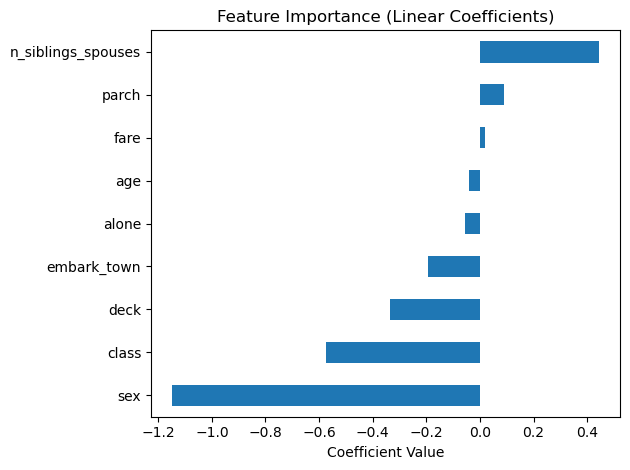

In [28]:
# Get weights for each feature (convert to float)
weights = []
for col in feature_coloumn:
    w = linear_est.get_variable_value(f'linear/linear_model/{col.key}/weights')
    weights.append(float(w[0]))  # Ensure it's a single float

# Create pandas Series
importance = pd.Series(weights, index=[col.key for col in feature_coloumn])

# Plot
importance.sort_values().plot(kind='barh', title='Feature Importance (Linear Coefficients)')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()


In [34]:
# Extract one example from test input
for features, _ in test_input_fn():
    sample_raw = {k: v.numpy()[0] for k, v in features.items()}
    break

# Decode any byte strings
clean_sample = {}
for k, v in sample_raw.items():
    if isinstance(v, bytes):
        v = v.decode()  # decode b'string' to 'string'
    clean_sample[k] = v

# Initialize encoded_sample to match model features
encoded_sample = {}

for key in importance.index:
    if key in clean_sample:
        # Numeric feature
        try:
            encoded_sample[key] = float(clean_sample[key])
        except ValueError:
            encoded_sample[key] = 0.0  # fallback if it's unexpected
    else:
        # Check for one-hot encoded feature like 'sex_male'
        parts = key.split('_')
        if len(parts) == 2 and parts[0] in clean_sample:
            encoded_sample[key] = 1.0 if clean_sample[parts[0]] == parts[1] else 0.0
        else:
            encoded_sample[key] = 0.0  # if not found

# Convert to Series
sample = pd.Series(encoded_sample)

# Calculate logit and probability
logits = (sample * importance).sum() + bias
probability = 1 / (1 + np.exp(-logits))

# Output
print("Sample input:")
print(sample)
print(f"\nLogit: {logits}")
print(f"Predicted probability (sigmoid): {probability[0]}")


Sample input:
sex                    0.00
n_siblings_spouses     0.00
parch                  0.00
deck                   0.00
class                  0.00
embark_town            0.00
alone                  0.00
age                   35.00
fare                   8.05
dtype: float64

Logit: [-1.2251363]
Predicted probability (sigmoid): 0.2270338088274002


In [35]:
from sklearn.metrics import accuracy_score

# Define hyperparameter grid
learning_rates = [0.01, 0.1, 0.5]
optimizers = ['Ftrl', 'SGD']
results = []

for lr in learning_rates:
    for opt in optimizers:
        print(f"Training with lr={lr}, optimizer={opt}")
        model = tf.estimator.LinearClassifier(
            feature_columns=feature_coloumn,
            optimizer=lambda: tf.keras.optimizers.get({
                'class_name': opt,
                'config': {'learning_rate': lr}
            }),
            model_dir=None  # disable checkpoint reuse
        )
        
        model.train(train_input_fn, steps=100)
        preds = list(model.predict(test_input_fn))
        y_pred = [int(p['class_ids'][0]) for p in preds]
        y_true = list(y_test)  # make sure y_test exists

        acc = accuracy_score(y_true, y_pred)
        print(f"Accuracy: {acc:.4f}")
        results.append(((lr, opt), acc))

# Print best hyperparameters
best = max(results, key=lambda x: x[1])
print(f"\nBest hyperparameters: lr={best[0][0]}, optimizer={best[0][1]} with accuracy={best[1]:.4f}")


Training with lr=0.01, optimizer=Ftrl
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\adity\\AppData\\Local\\Temp\\tmpn57thhs0', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instruct